Class encoding: {'High': 0, 'Low': 1, 'Medium': 2}

Accuracy: 0.4325

Classification Report:
              precision    recall  f1-score   support

        High       0.45      0.60      0.51       131
         Low       0.45      0.50      0.48       137
      Medium       0.36      0.20      0.25       132

    accuracy                           0.43       400
   macro avg       0.42      0.43      0.41       400
weighted avg       0.42      0.43      0.41       400



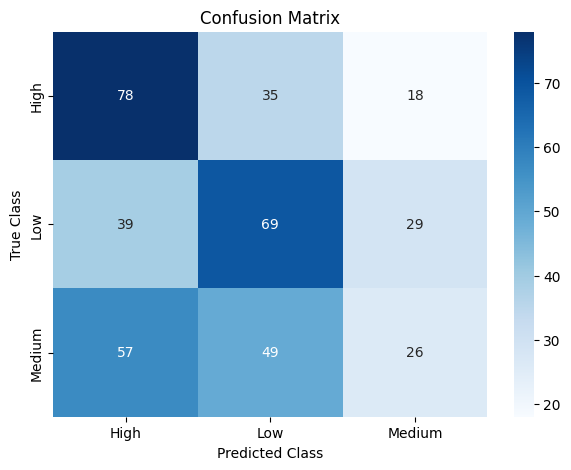


Coefficients for each class (One-Vs-Rest):

Class 'High' coefficients:
   weekly_self_study_hours  engagement_score  absence_days  part_time_job
0                 0.088839         -0.019258     -0.037162       -0.23945

Class 'Low' coefficients:
   weekly_self_study_hours  engagement_score  absence_days  part_time_job
0                -0.091175          0.033592      0.113407       0.307677

Class 'Medium' coefficients:
   weekly_self_study_hours  engagement_score  absence_days  part_time_job
0                -0.000272         -0.010853     -0.094267      -0.220064


In [10]:
#Student Performance Logistic regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Data\student_scores_chi_selected.csv")

# Encode target variable 
label_encoder = LabelEncoder()
df['performance_encoded'] = label_encoder.fit_transform(df['performance_group'])

# Class encoding mapping
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Class encoding:", mapping)

# Prepare features and target
X = df[['weekly_self_study_hours', 'engagement_score', 'absence_days', 'part_time_job']]
y = df['performance_encoded']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Build and train logistic regression model 
base_model = LogisticRegression(max_iter=1000)
model = OneVsRestClassifier(base_model)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


# Display model coefficients (feature importance)
coefficients = pd.DataFrame(
    model.estimators_[0].coef_,
    columns=X.columns,
)

print("\nCoefficients for each class (One-Vs-Rest):")
for i, cls in enumerate(label_encoder.classes_):
    print(f"\nClass '{cls}' coefficients:")
    print(pd.DataFrame(model.estimators_[i].coef_, columns=X.columns))


Class encoding: {'High': 0, 'Low': 1, 'Medium': 2}

Accuracy: 0.3975

Classification Report:
              precision    recall  f1-score   support

        High       0.39      0.40      0.40       131
         Low       0.43      0.43      0.43       137
      Medium       0.38      0.36      0.37       132

    accuracy                           0.40       400
   macro avg       0.40      0.40      0.40       400
weighted avg       0.40      0.40      0.40       400



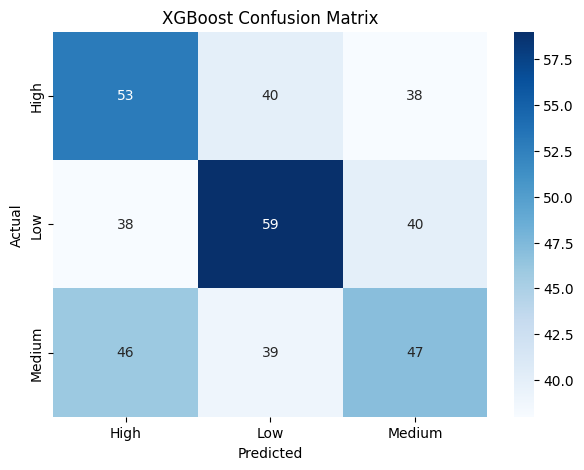

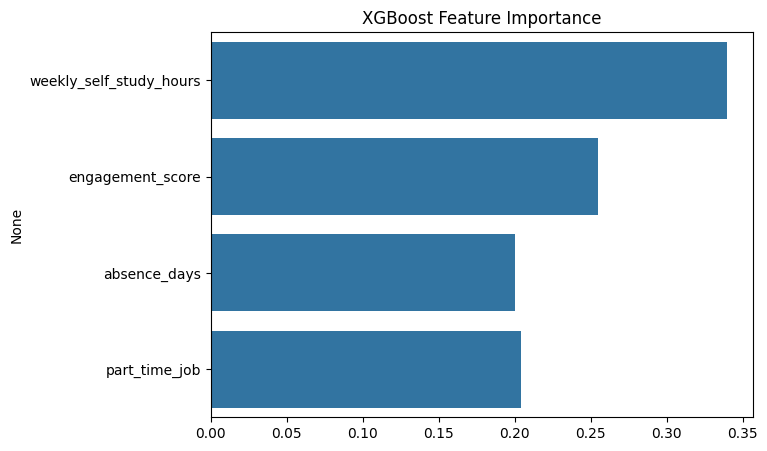

In [9]:
# Student Performance xgboost
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

df = pd.read_csv(r"C:\Data\student_scores_chi_selected.csv")

#  Encode target variable
label_encoder = LabelEncoder()
df['performance_encoded'] = label_encoder.fit_transform(df['performance_group'])

# Show mapping
print("Class encoding:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


#  Prepare X and y 
X = df[['weekly_self_study_hours', 'engagement_score', 'absence_days', 'part_time_job']]
y = df['performance_encoded']


#  Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# XGBoost model for multi-class classification

model = XGBClassifier(
    objective="multi:softmax",
    num_class=len(label_encoder.classes_),
    eval_metric="mlogloss",
    learning_rate=0.1,
    max_depth=5,
    n_estimators=300,
    subsample=0.9,
    colsample_bytree=0.9,
    gamma=0.1,
    random_state=42
)

model.fit(X_train, y_train)


# Predictions & evaluation

y_pred = model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature importance
plt.figure(figsize=(7,5))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title("XGBoost Feature Importance")
plt.show()


scale_pos_weight: 1.9250457038391224

Accuracy: 0.645

Classification Report (High risk = 1):
               precision    recall  f1-score   support

Not high risk       0.74      0.70      0.72       263
    High risk       0.48      0.54      0.51       137

     accuracy                           0.65       400
    macro avg       0.61      0.62      0.62       400
 weighted avg       0.66      0.65      0.65       400



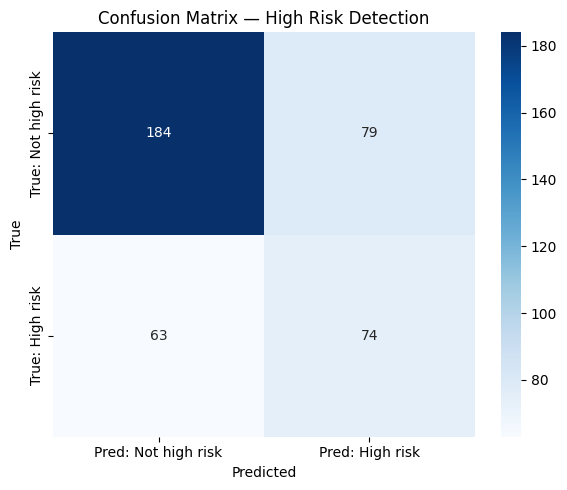


ROC-AUC: 0.682


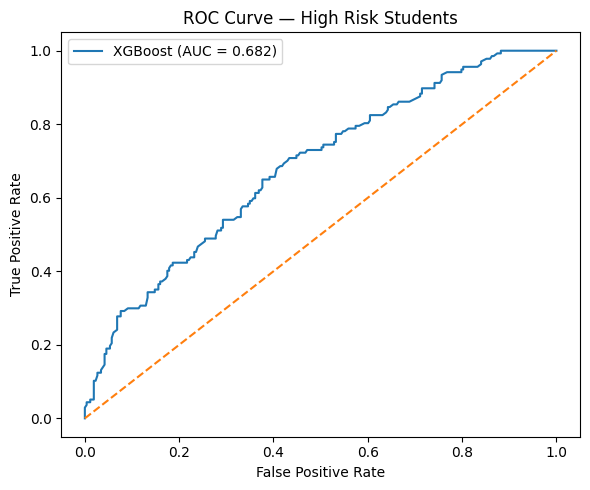

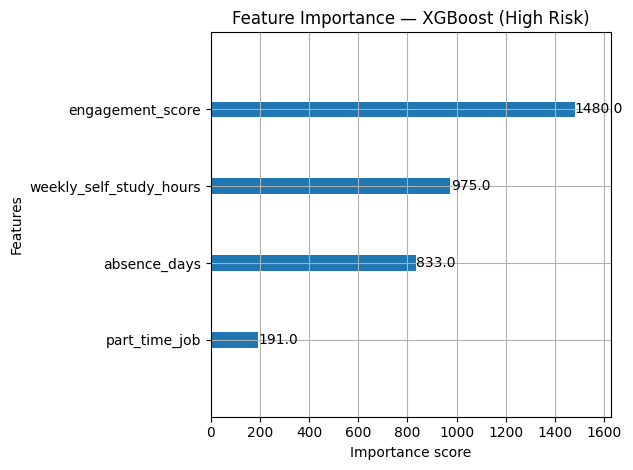

In [11]:
# High risk xgboost
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    accuracy_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

df = pd.read_csv(r"C:\Data\student_scores_chi_selected.csv")


#  Create binary target: high risk vs not
#  High risk = performance_group == "Low"
df["high_risk"] = (df["performance_group"] == "Low").astype(int)

# Features (chi-selected)
feature_cols = [
    "weekly_self_study_hours",
    "engagement_score",
    "absence_days",
    "part_time_job"
]
X = df[feature_cols]
y = df["high_risk"]


# Train/test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Handle imbalance with scale_pos_weight
pos = y_train.sum()
neg = len(y_train) - pos
scale_pos_weight = neg / pos if pos > 0 else 1.0
print("scale_pos_weight:", scale_pos_weight)

#  Build and train XGBoost model
model = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

model.fit(X_train, y_train)

#  Predictions & evaluation
# Predicted probabilities and labels
y_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)   # threshold = 0.5

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.3f}")

# Classification report
print("\nClassification Report (High risk = 1):")
print(classification_report(y_test, y_pred, target_names=["Not high risk", "High risk"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Pred: Not high risk", "Pred: High risk"],
    yticklabels=["True: Not high risk", "True: High risk"]
)
plt.title("Confusion Matrix — High Risk Detection")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


# ROC-AUC & ROC Curve

auc = roc_auc_score(y_test, y_proba)
print(f"\nROC-AUC: {auc:.3f}")

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — High Risk Students")
plt.legend()
plt.tight_layout()
plt.show()

# Feature Importance

xgb.plot_importance(model)
plt.title("Feature Importance — XGBoost (High Risk)")
plt.tight_layout()
plt.show()
